NAMA : FANISA NIMASTITI

NIM : 20110004

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Problem Scope**

Pembangunan merupakan suatu upaya yang dilakukan oleh pemerintah . indikator yang dapat digunakan untuk mengukur hasil pembangunan adalah Indeks Pembangunan Manusia (IPM). IPM menjelaskan bagaimana penduduk dapat mengakses hasil pembangunan dala memperoleh pendapatan, kesehatan, pendidikan, dan sebagainya. Dengan adanya pembangunan tersebut diharapkan taraf hidup masyarakat menjadi lebih sejahtera sehingga kualitas sumber daya manusia menjadi lebih baik. Akan tetapi, Indonesia sendiri memiliki kualitas sumber daya manusia yang bervariasi. Hal tersebut dikarenakan terdapat tidak meratanya pembangunan maka dari itu perlu adanya klasifikasi IPM. Pada project kali  ini metode yang digunakan adalah Random Forest ,Adaboost , dan Decision Tree yang bertujuan untuk membandingkan akurasi klasifikasi Indeks Pembangunan Manusia (IPM) di indonesia.







In [ ]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
#Load Dataset
a = pd.read_csv("/content/drive/My Drive/dataset/IPM.csv")

**About Dataset**

Data yang digunakan pada project adalah data sekunder yang diperoleh dari Badan Pusat Statistik (BPS). Dimana data yang digunakan, yaitu Indeks Pembangunan Manusia (IPM), Harapan Lama Sekolah, Pengeluaran Perkapita, Rerata Lama Sekolah, dan Usia Harapan Hidup ,yang terdiri atas 2196 baris × 5 kolom


EDA

In [ ]:
a

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


In [ ]:
a.shape

(2196, 5)

In [ ]:
#Untuk mengetahui data duplikat
a.duplicated().sum()

0

In [ ]:
#mengetahui informasi umum dataset
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [ ]:
a.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


In [ ]:
a['IPM'].unique()

array(['High', 'Normal', 'Very-High', 'Low'], dtype=object)

In [ ]:
b = a['IPM'].value_counts()
b

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

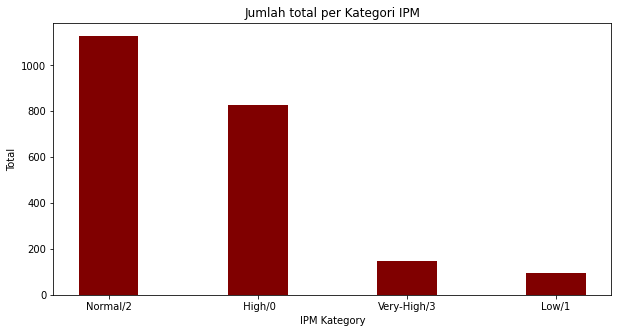

In [ ]:
# creating the dataset
data = {'Normal/2': 1128, ' High/0':829, 'Very-High/3':146,
        'Low/1':93}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("IPM Kategory")
plt.ylabel("Total")
plt.title("Jumlah total per Kategori IPM")
plt.show()

DATA PREPROCESSING

In [ ]:
le = preprocessing.LabelEncoder()
a["IPM"] = le.fit_transform(a["IPM"])
a["IPM"].unique()

array([0, 2, 3, 1])

In [ ]:
a

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,0
1,13.90,7148,9.48,65.28,2
2,14.32,8776,8.68,67.43,2
3,14.60,8180,8.88,64.40,2
4,14.01,8030,9.67,68.22,2
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,1
2192,7.11,5440,2.51,65.26,1
2193,9.79,4761,2.99,64.83,1
2194,14.99,14922,11.30,70.15,0


In [ ]:
a.corr()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
Harapan_Lama_Sekolah,1.000000,0.518389,0.774683,0.379314,-0.058479
Pengeluaran_Perkapita,0.518389,1.000000,0.667975,0.562290,-0.135206
Rerata_Lama_Sekolah,0.774683,0.667975,1.000000,0.420824,-0.146664
Usia_Harapan_Hidup,0.379314,0.562290,0.420824,1.000000,-0.240056
IPM,-0.058479,-0.135206,-0.146664,-0.240056,1.000000


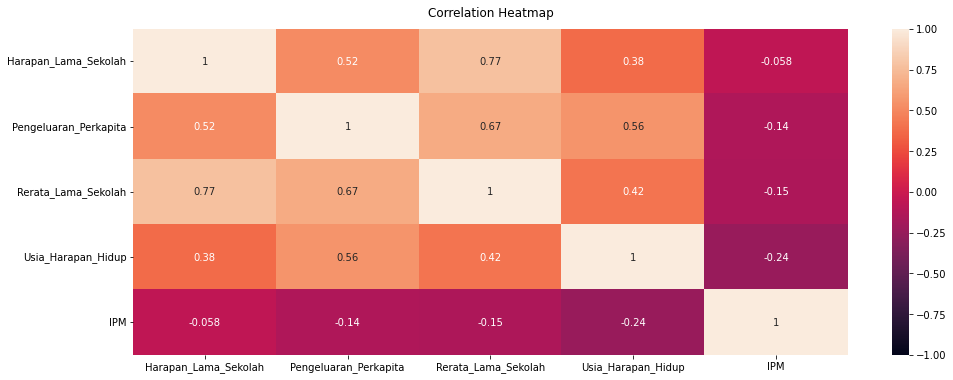

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(a.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
#Mendefinisikan variabel X dan Y
X = a.drop(['IPM'],axis = 1)
y = a['IPM']

In [ ]:
#Membagi dataset menjadi data training dan testing dengan rasio 20% data digunakan sebagai data testing. Dengan pemilihan random data sebesar 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape

((1756, 4), (440, 4))

In [ ]:
nblc = y_train.value_counts()
nblc

2    901
0    665
3    113
1     77
Name: IPM, dtype: int64

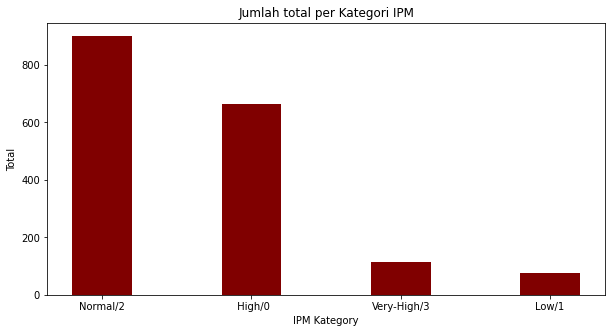

In [ ]:
# creating the dataset
data = {'Normal/2': 901, ' High/0': 665, 'Very-High/3': 113,
        'Low/1': 77}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("IPM Kategory")
plt.ylabel("Total")
plt.title("Jumlah total per Kategori IPM")
plt.show()

In [ ]:
#BALANCING DATASET
from imblearn.over_sampling import SMOTE
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [ ]:
blc = y_train_SMOTE.value_counts()
blc

2    901
0    901
3    901
1    901
Name: IPM, dtype: int64

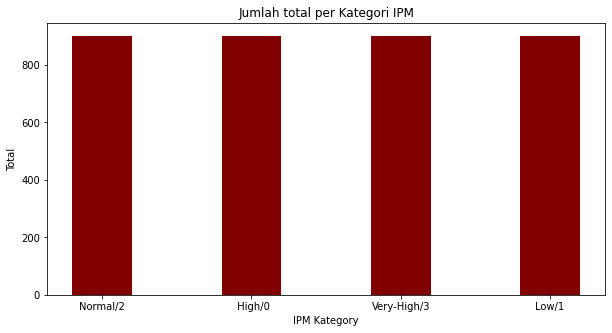

In [ ]:
# creating the dataset
data = {'Normal/2': 901, ' High/0': 901, 'Very-High/3': 901,
        'Low/1': 901}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("IPM Kategory")
plt.ylabel("Total")
plt.title("Jumlah total per Kategori IPM")
plt.show()

**MODELLING**

MODEL 1 Random Forest

In [ ]:
# MODEL
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
from sklearn.ensemble import RandomForestClassifier
classifier_rf2 = RandomForestClassifier(n_estimators=10, criterion="gini")
classifier_rf2.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(n_estimators=10)

In [ ]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred = classifier_rf2.predict(X_test)

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf2.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', classifier_rf2.score(X_test, y_test))

Training-set accuracy score: 0.9997225305216426
Test-set accuracy score: 0.9681818181818181


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       164
           1       0.94      1.00      0.97        16
           2       1.00      0.96      0.98       227
           3       0.94      0.97      0.96        33

    accuracy                           0.97       440
   macro avg       0.95      0.98      0.97       440
weighted avg       0.97      0.97      0.97       440



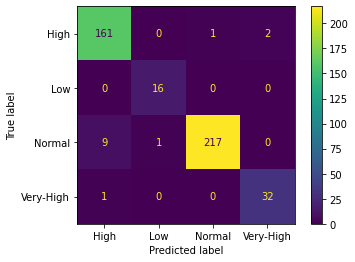

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["High","Low","Normal","Very-High" ])

cm_display.plot()
plt.show()

MODEL 2 ADABOOST

In [ ]:
# --- Applying AdaBoost ---
from sklearn.ensemble import AdaBoostClassifier
ABclassifier = AdaBoostClassifier(n_estimators=100)

ABclassifier.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_AB = ABclassifier.predict(X_test)

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', ABclassifier.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', ABclassifier.score(X_test, y_test))

Training-set accuracy score: 0.3995560488346282
Testing-set accuracy score: 0.10454545454545454


In [ ]:
print(classification_report(y_test, y_pred_AB))

              precision    recall  f1-score   support

           0       0.46      0.12      0.19       164
           1       0.04      1.00      0.08        16
           2       0.00      0.00      0.00       227
           3       0.69      0.33      0.45        33

    accuracy                           0.10       440
   macro avg       0.30      0.36      0.18       440
weighted avg       0.23      0.10      0.11       440



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


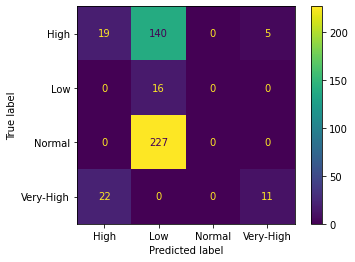

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_pred_AB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["High","Low","Normal","Very-High" ])

cm_display.plot()
plt.show()

MODEL 3 DECISSION TREE

In [ ]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
y_pred_GB = clf.fit(X_train_SMOTE, y_train_SMOTE).predict(X_test)

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', clf.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', clf.score(X_test, y_test))

Training-set accuracy score: 1.0
Testing-set accuracy score: 0.9545454545454546


In [ ]:
print(classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       164
           1       0.88      0.94      0.91        16
           2       0.99      0.93      0.96       227
           3       0.94      0.97      0.96        33

    accuracy                           0.95       440
   macro avg       0.93      0.96      0.94       440
weighted avg       0.96      0.95      0.95       440



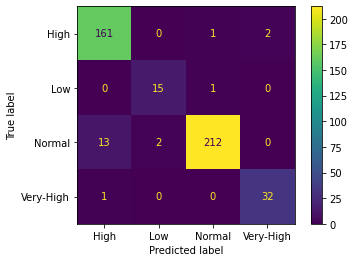

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_pred_GB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["High","Low","Normal","Very-High" ])

cm_display.plot()
plt.show()

**Kesimpulan**

Berdasarkan hasil dan pembahasan di atas, dapat disimpulkan bahwa klasifikasi Indeks Pembangunan Manusia (IPM) dengan menggunakan metode Random forest dengan parameter n_estimators=10, dan criterion="gini" memiliki akurasi sebesar 97 % lebih tinggi dari pada model yang menggunakan Decision Tree yang hanya sampai 95 % . selain itu juga untuk data yang diolah menggunakan AdaBoost meskipun akurasinya mencapai 100 % , namun jika dilihat lebih teliti pada precission , recall , dan f1 score model sangat rendah .maka dari itu dari ketiga model tersebut model Random Forest merupakan model yang cocok digunakan pada dataset kali ini.